<a href="https://colab.research.google.com/github/laura5186/Machine-Learning/blob/main/A6_Optimization__and_SGD_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment 6: Optimization and Stochastic Gradient Descent (Solution)

[Stochastic Gradient Descent (SGD)](https://en.wikipedia.org/wiki/Stochastic_gradient_descent) is an efficient optimization algorithm for minimizing cost/ objective functions in optimization problems. It updates model parameters using the gradient of cost function with respect to a small subset of training examples, in contrast to traditional Gradient Descent (true gradient) that uses all training examples.

------------

In this assignment, we will create a linear model on a Weight-Height dataset using SGD. Lets start by importing necessary packages and generating the data.

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

SEED = 42
random.seed(SEED)
np.random.seed(SEED)

In [ ]:
# Generate data

# Weight (Kgs), input features
# Generate 50 random weights starting from 50 kg upto 120 kg, sort them
X = np.sort(np.random.randint(40, 120, 100))

# Height (ft.), target values
# Assign corresponding heights, make it random
y = np.asarray([item/30 + np.random.randint(2,3,1) + np.random.rand() for item in X])

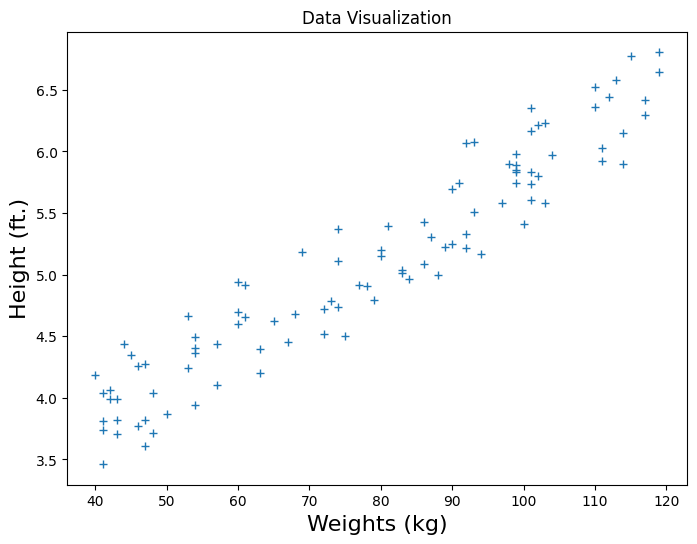

In [ ]:
# Write a function to plot datam with an option to plot a line (will need in future)
def plot_data_line(X, y, model=None):
  fig, ax = plt.subplots(figsize=(8,6), dpi = 100)
  ax.plot(X,y,'+')

  # Dont worry about this part for now
  # It includes a line through data, if supplied
  if model is not None:
    predictions = model['m'] * X + model['c']
    ax.plot(X, predictions)

  ax.set_xlabel("Weights (kg)", fontsize=16)
  ax.set_ylabel("Height (ft.)", fontsize=16)
  ax.set_title("Data Visualization")

# Use the function
plot_data_line(X, y)

In [ ]:
# Split the dataset into test and train sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

The linear model has 2 parameters (m and c) and is expressed by:

$$ y = m \cdot x + c$$

Where (y) is the dependent variable (Weight) and x is the independent variable (Height). Since this is a regression problem, a good choice for our loss function is Mean Squared Error (MSE):

$$\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$$

where
- n is the number of samples,
- $y_i$ is the true label for the i-th sample,
- and $\hat{y}_i$ is the predicted label for the i-th sample.

---
# Exercise 1.

Please finish the following task.

Write code to calculate the Mean Squared Error.

In [ ]:
#### SOLUTION ####

# Define a MSE loss function
def loss_func(predictions, targets):
  error = predictions - targets
  squared_error = error**2
  mean_squared_error = np.mean(squared_error)
  return mean_squared_error

The prediction made by the model is given by:

$$\hat{y}_i = m\cdot x_i + c$$

where $x_i$ is the feature vector for the $i^{th}$ sample.

To update the parameters m and bias c in each iteration of stochastic gradient descent, we need to calculate the gradients of the MSE with respect to m and c. The gradients are given by:

$$\frac{\partial \text{MSE}}{\partial m} = \frac{2}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i) x_i$$

$$\frac{\partial \text{MSE}}{\partial c} = \frac{2}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)$$

where 'n' is the batch size. The update rule for weight and bias is given by:

$$m = m - \eta \frac{\partial \text{MSE}}{\partial m}$$

$$c = c - \eta \frac{\partial \text{MSE}}{\partial c}$$

where $\eta$ is the learning rate.

---
# Exercise 2.

Please finish the following task.

Write code to implement the parameter update rule for m and c.

In [ ]:
#### SOLUTION ####

# Define a single step Stochastic Gradient Descent
# Every iteartion step, it updates the paramter values

def stochastic_gradient_descent(X, y, m, c, learning_rate, batch_size):

    # Select a random batch of data, all data points have a uniform probability of getting sampled
    indices = np.random.randint(0, X.shape[0], size=batch_size)

    X_batch = np.squeeze(X[indices])
    y_batch = np.squeeze(y[indices])

    y_pred = X_batch.dot(m) + c
    error = y_pred - y_batch

    # remember, we calculate the gradient of the loss with respect to the paramter
    # Calculate the gradient for the batch
    gradient_m = (2/batch_size) * X_batch.T.dot(error) # How did we get this? In a sheet of paper, calculate the derivative of MSE
    gradient_c = (2/batch_size) * error.sum()

    # Update the weights and bias
    m_new = m - learning_rate * gradient_m
    c_new = c - learning_rate * gradient_c

    return m_new, c_new

Model parameters: {'m': 0.7352161192407721, 'c': 0.20907162073771368}


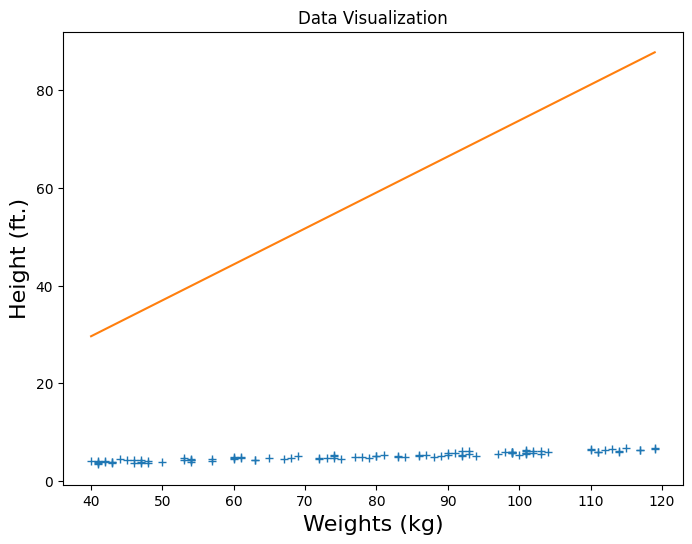

In [ ]:
# Start with a randomly initialized model
# we are saving model parameters in a dictionary

model = {'m': np.random.rand(), 'c': np.random.rand()}
print(f"Model parameters: {model}")

# Plot the randomly initialized model in data
plot_data_line(X, y , model)

# How well does this randomly initialized model describe the data?

In [ ]:
# The three items below are hyper-paramters, do you want to try to change them?
learning_rate = 0.0001
batch_size = 16 # How many data items to look at, in each gradient calculation
num_iterations = 10 # Stopping criteria

m = model['m']
c = model['c']

losses= []
for i in range(num_iterations):
  m, c = stochastic_gradient_descent(X_train, y_train, m, c,learning_rate,batch_size)

  # We look at generalization performance on the test set
  predictions = X_test.dot(m) + c

  loss = loss_func(predictions, y_test)
  print(f"Iteration: {i+1}, Loss :{round(loss,2)}")

  losses.append(loss)

Iteration: 1, Loss :301.84
Iteration: 2, Loss :88.61
Iteration: 3, Loss :10.01
Iteration: 4, Loss :2.89
Iteration: 5, Loss :2.29
Iteration: 6, Loss :2.38
Iteration: 7, Loss :2.39
Iteration: 8, Loss :2.38
Iteration: 9, Loss :2.34
Iteration: 10, Loss :2.29


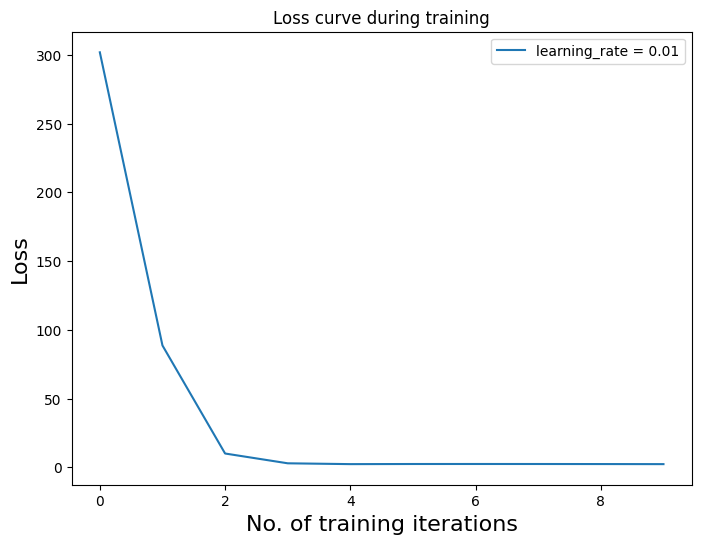

In [ ]:
def plot_loss(losses, tag = None):
  fig, ax = plt.subplots(figsize=(8,6), dpi=100)

  ax.plot(losses, label = tag)
  ax.legend()

  ax.set_xlabel("No. of training iterations", fontsize=16)
  ax.set_ylabel("Loss", fontsize=16)
  ax.set_title("Loss curve during training")

plot_loss(losses, "learning_rate = 0.01")

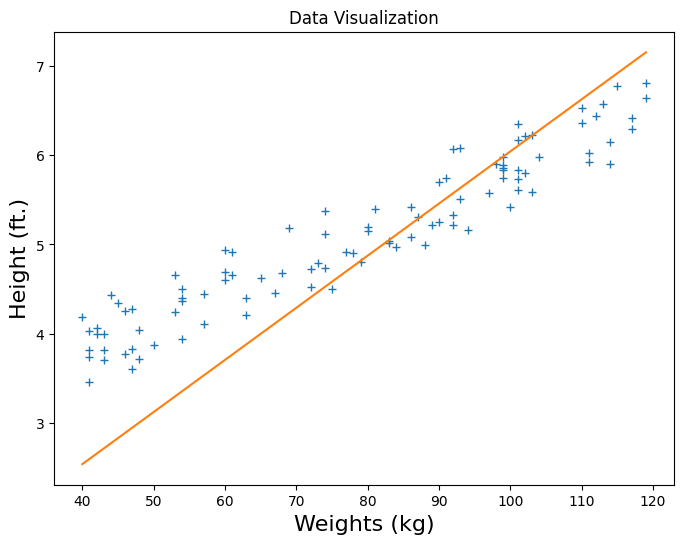

In [ ]:
# good_model = {'m': 0.045, 'c': 1.5}

# The learned model can describe data well.
new_model = {'m': m, 'c': c}
plot_data_line(X, y , new_model)